In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('car+data.csv')

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print('Rows',data.shape[0])
print('Columns',data.shape[1])

Rows 301
Columns 9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
data.describe(include='object').T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


<AxesSubplot:>

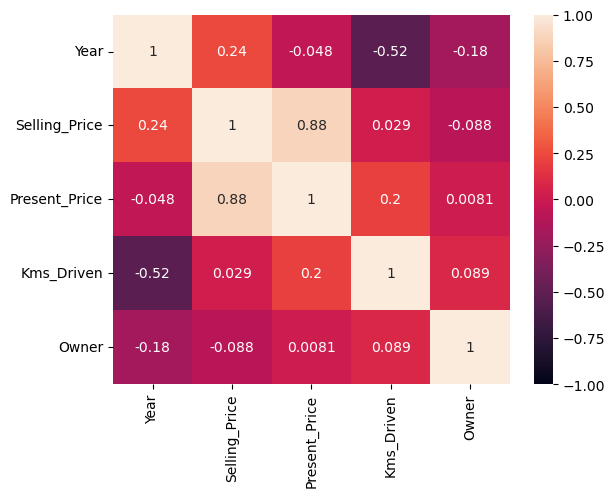

In [9]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True)

## Univariate Analysis

In [10]:
num_cols = ['Selling_Price','Present_Price','Kms_Driven']
cat_cols = ['Year','Fuel_Type','Seller_Type','Transmission','Owner']

		UNIVARIATE ANALYSIS (NUMERIC COLUMNS)


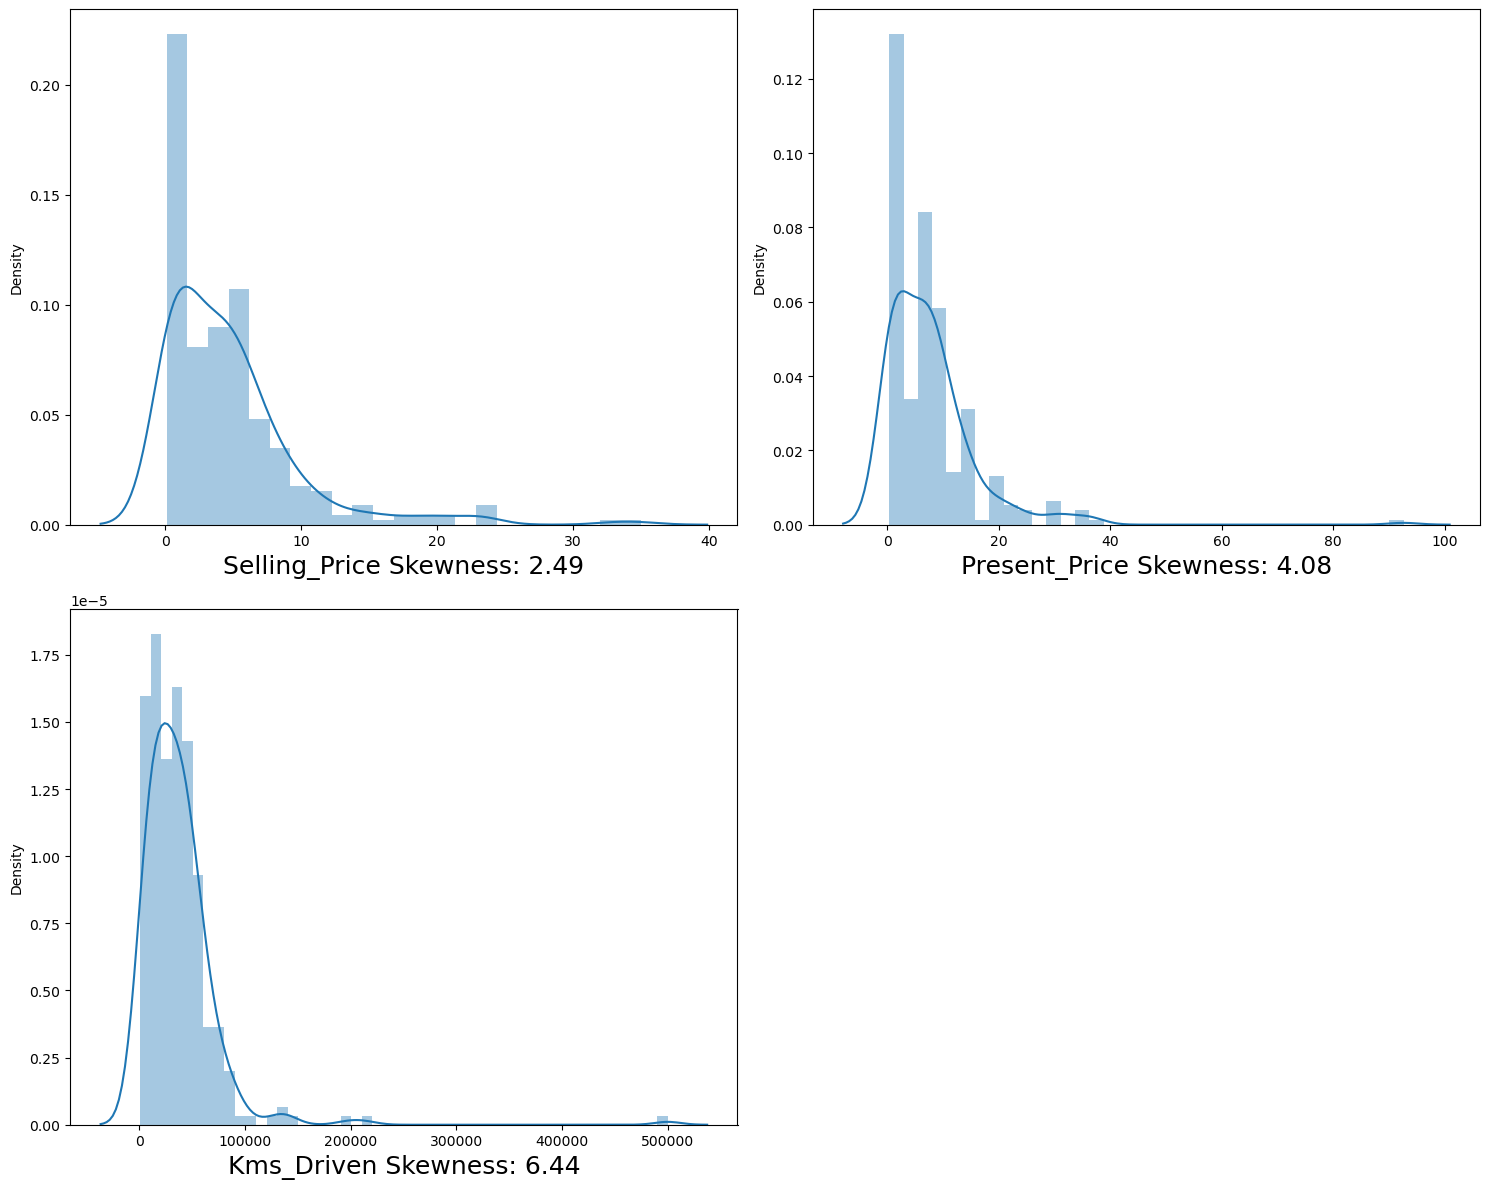

In [11]:
t= 1
plt.figure(figsize=(15,12))
print('\t\tUNIVARIATE ANALYSIS (NUMERIC COLUMNS)')
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s Skewness: %.2f'%(i,data[i].skew()),fontsize=18)
    t+=1
plt.tight_layout()
plt.show()

		UNIVARIATE ANALYSIS (CATEGORICAL COLUMNS)


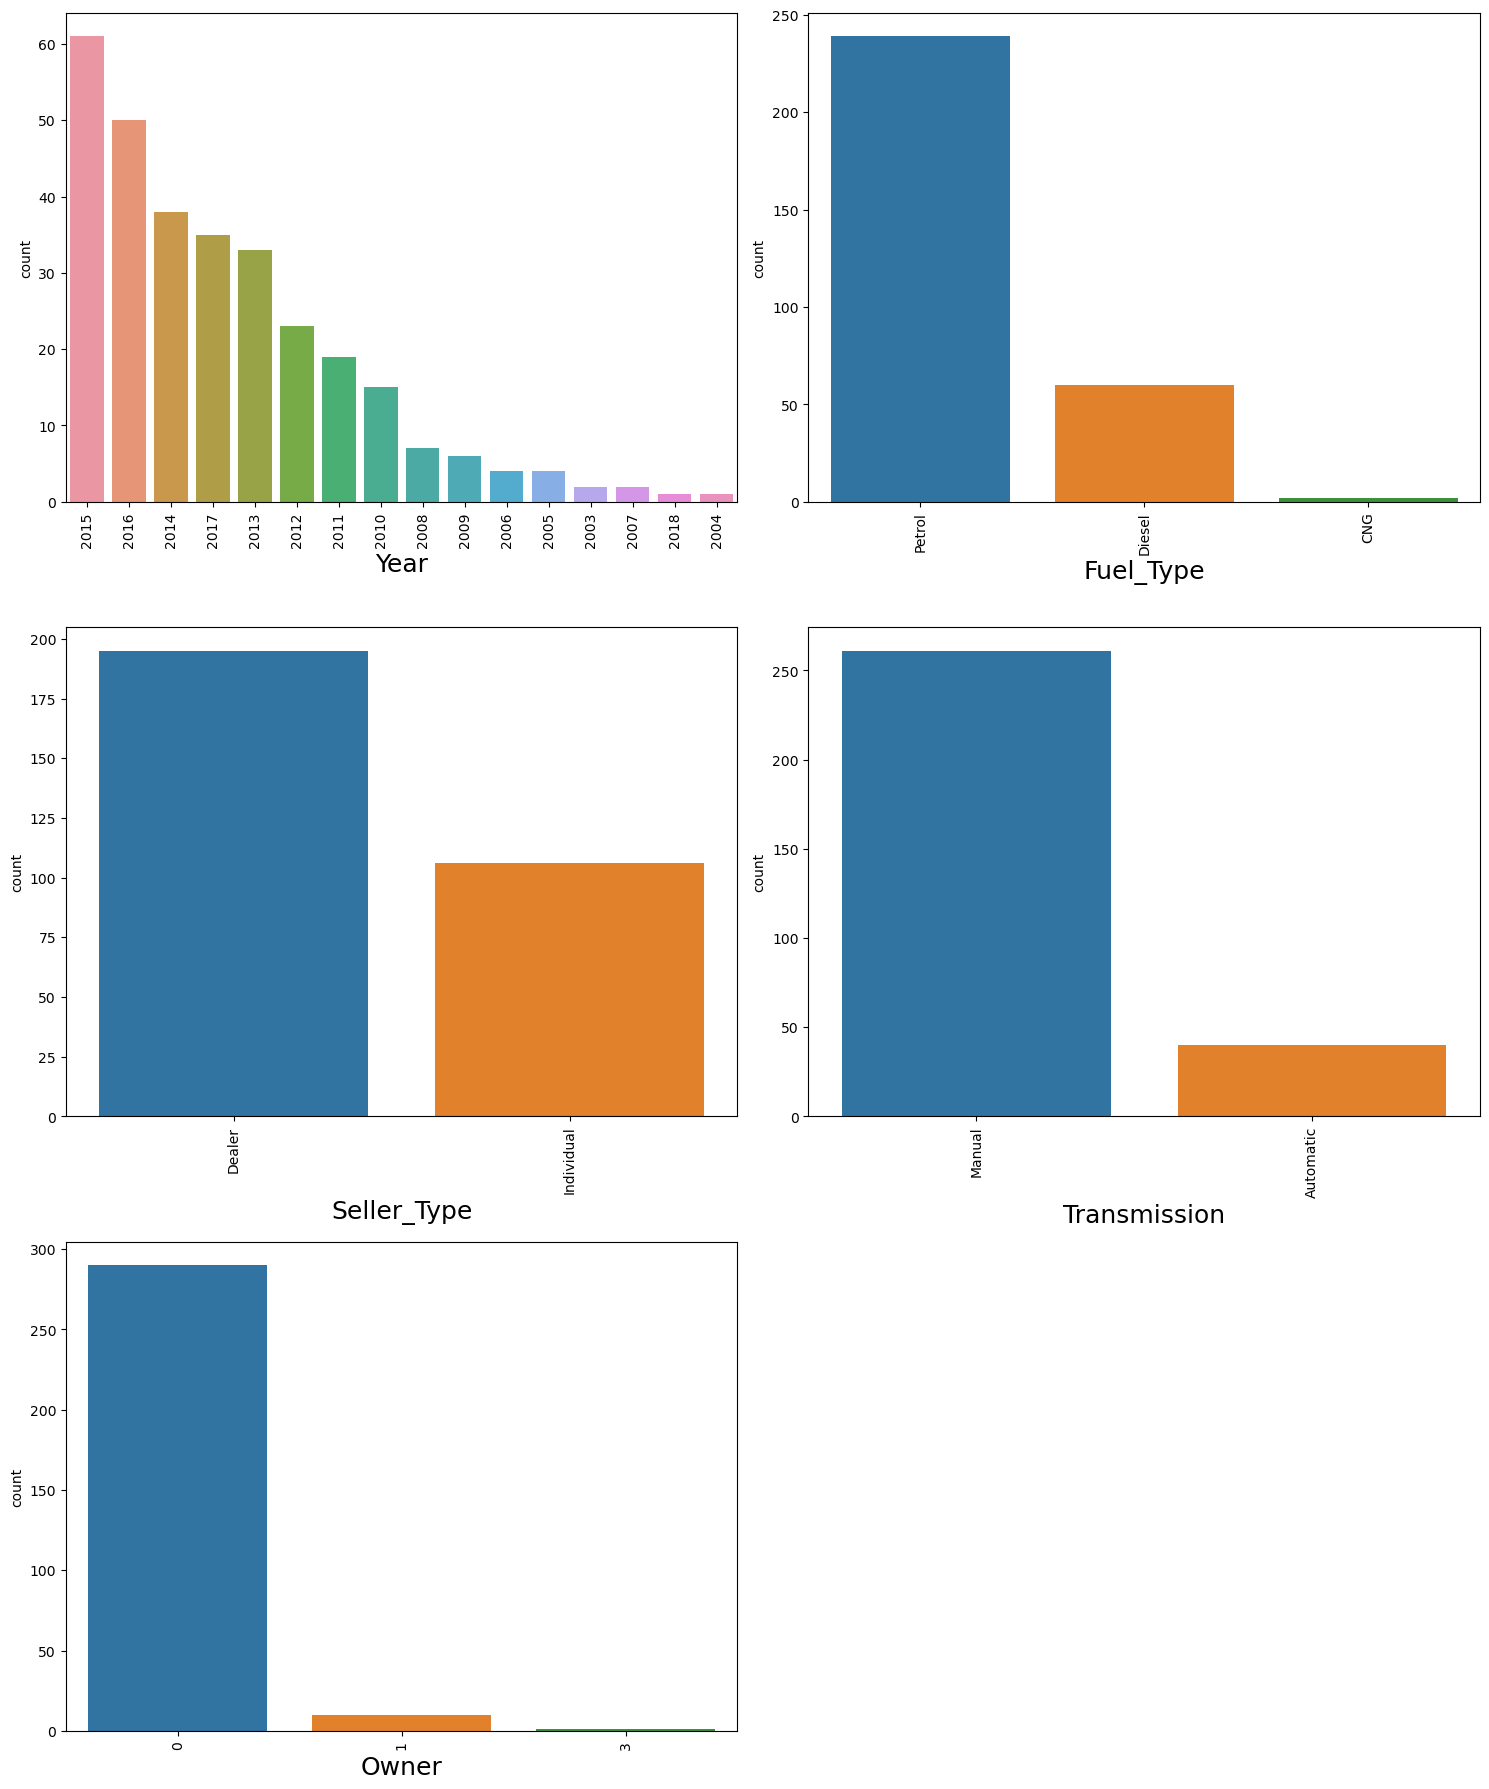

In [12]:
t= 1
plt.figure(figsize=(15,18))
print('\t\tUNIVARIATE ANALYSIS (CATEGORICAL COLUMNS)')
for i in cat_cols:
    plt.subplot(3,2,t)
    ord_c = data[i].value_counts().sort_values(ascending=False).index
    sns.countplot(data[i],order=ord_c)
    plt.xlabel(i,fontsize=18)
    plt.xticks(rotation='vertical')
    t+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis

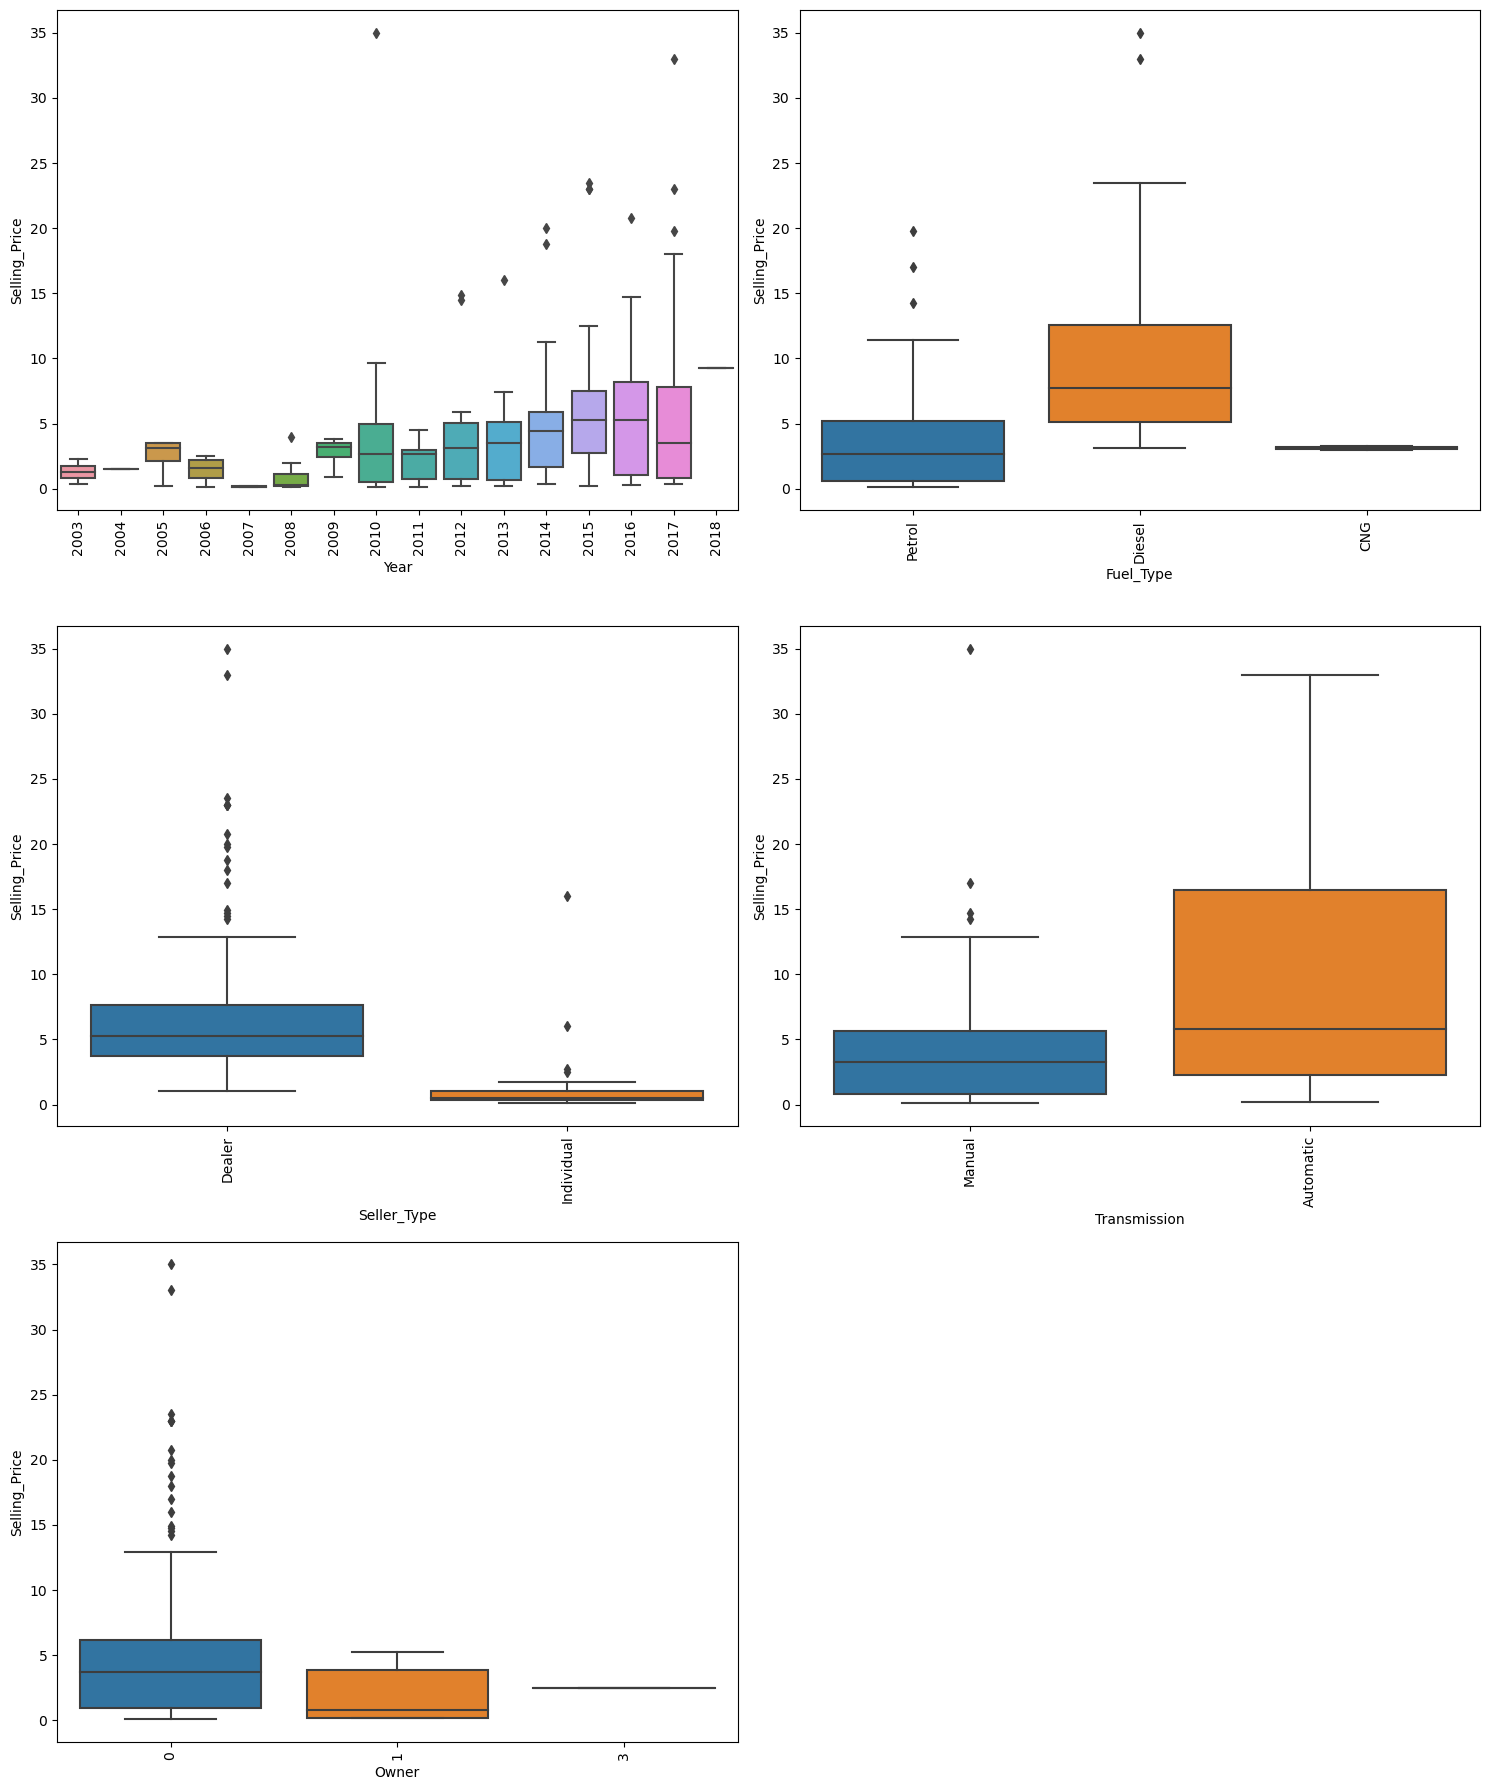

In [13]:
t=1
plt.figure(figsize=(15,18))
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.boxplot(x=data[i],y=data['Selling_Price'])
    plt.xticks(rotation='vertical')
    t+=1
plt.tight_layout()
plt.show()

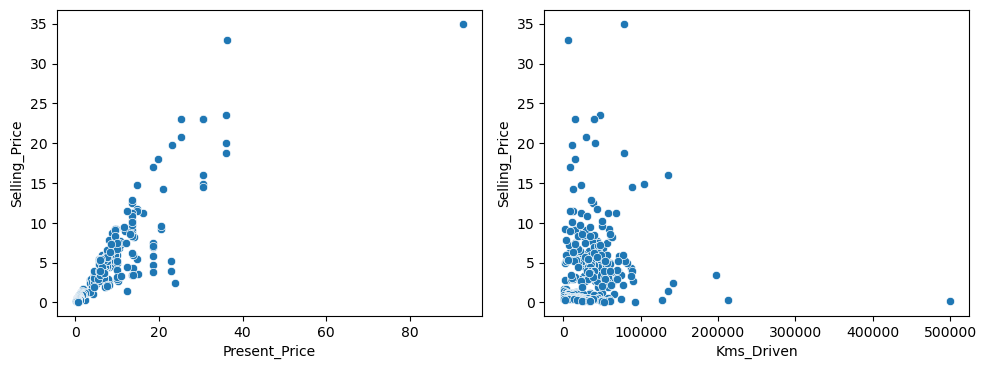

In [14]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    if i != 'Selling_Price':
        plt.subplot(2,2,t)
        sns.scatterplot(x=data[i],y=data['Selling_Price'])
        t+=1
plt.tight_layout()
plt.show()

## DATA Preprocessing

## Outlier treatment

		UNIVARIATE ANALYSIS (NUMERIC COLUMNS)


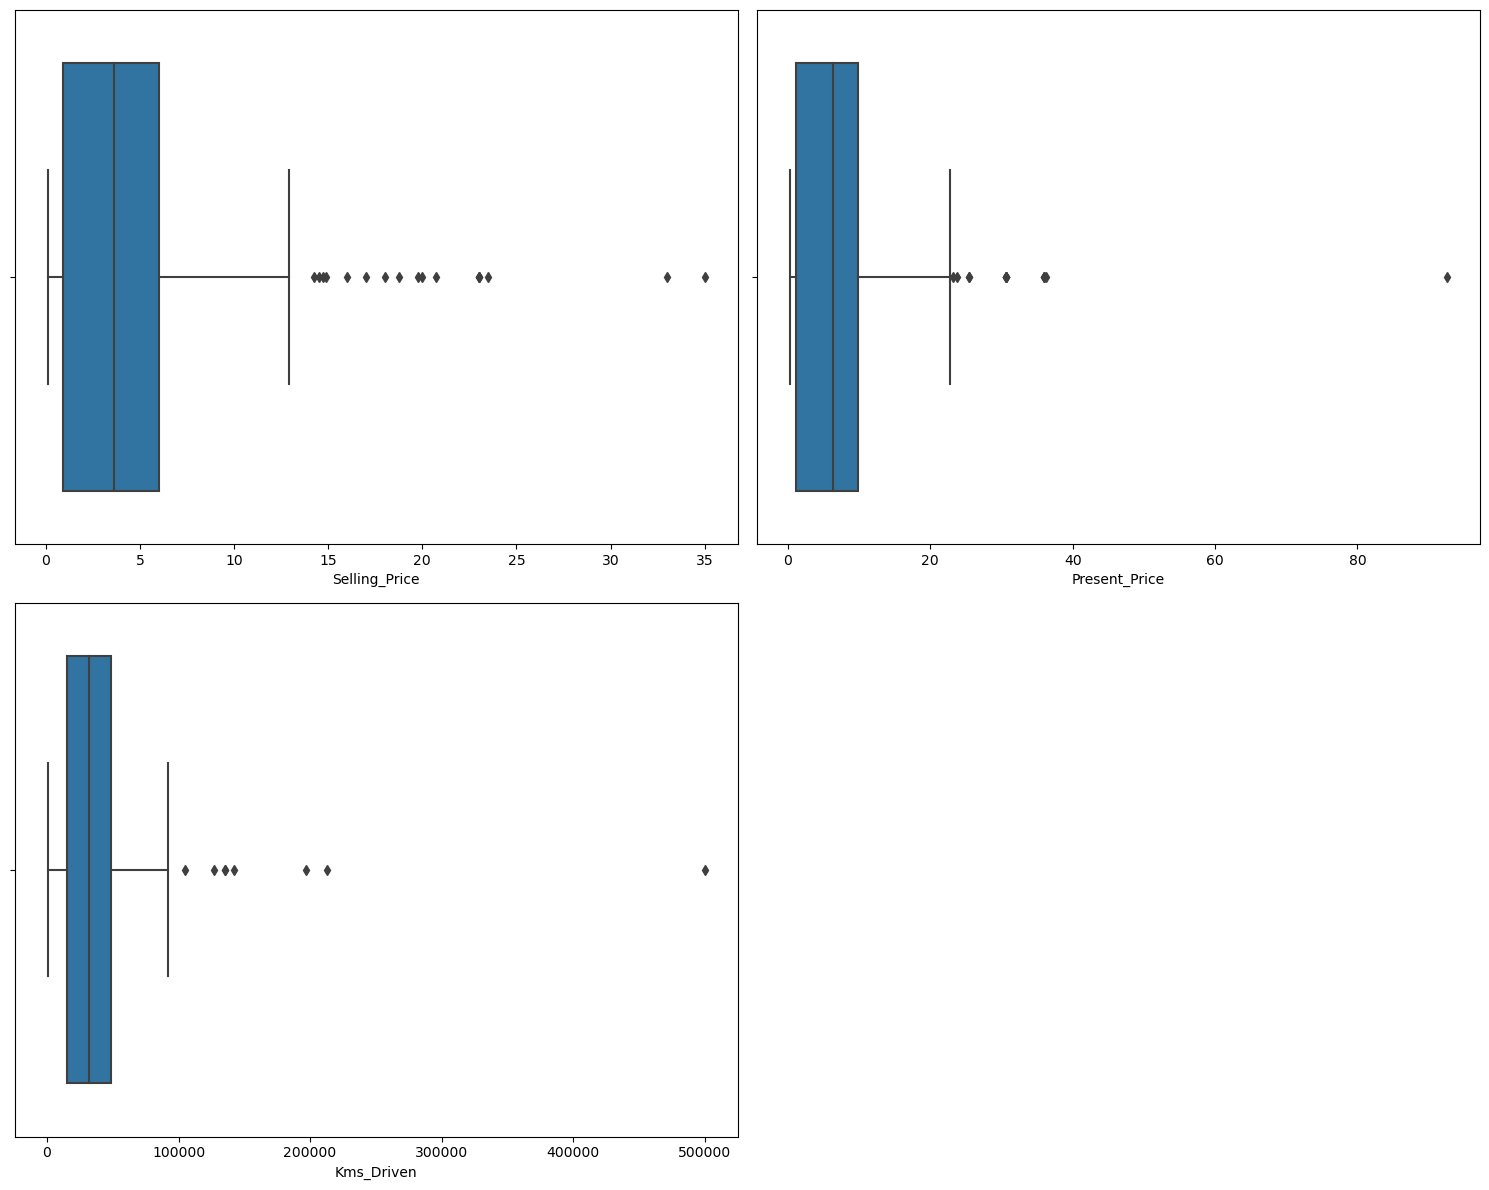

In [15]:
t= 1
plt.figure(figsize=(15,12))
print('\t\tUNIVARIATE ANALYSIS (NUMERIC COLUMNS)')
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [16]:
data[data['Selling_Price']>30]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [17]:
data[data['Present_Price']>40]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [18]:
data[data['Kms_Driven']>400000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [19]:
data.drop(index=[196,86,64],inplace=True)

### Encoding

In [20]:
# Lets perform frequency encoding on car name
map_data = data['Car_Name'].value_counts(normalize=True).to_dict()

In [21]:
data['Car_Name'] = data['Car_Name'].map(map_data)

In [22]:
# Lets try frequency encoding on year data
map_data = data['Year'].value_counts(normalize=True).to_dict()

In [23]:
data['Year'] = data['Year'].map(map_data)

In [24]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.013423,0.127517,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,0.020134,0.110738,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,0.030201,0.114094,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,0.013423,0.063758,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,0.016779,0.127517,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,0.087248,0.167785,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,0.033557,0.204698,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,0.087248,0.020134,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,0.087248,0.114094,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [25]:
# One hot encoding for other variables

In [26]:
data = pd.get_dummies(data)

In [27]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0.013423,0.127517,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,0.020134,0.110738,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,0.030201,0.114094,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,0.013423,0.063758,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,0.016779,0.127517,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.087248,0.167785,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,0.033557,0.204698,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,0.087248,0.020134,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,0.087248,0.114094,11.50,12.50,9000,0,0,1,0,1,0,0,1


In [28]:
data.drop(columns=['Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual'],inplace=True)

### Feature transformation

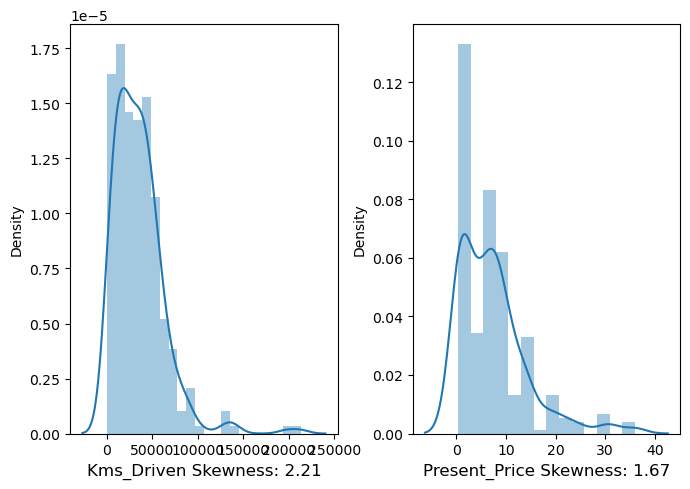

In [29]:
t=1
plt.figure(figsize=(7,5))
for i in ['Kms_Driven','Present_Price']:
    plt.subplot(1,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s Skewness: %.2f'%(i,data[i].skew()),fontsize=12)
    t+=1
plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import PowerTransformer

In [31]:
pt = PowerTransformer(method='box-cox',standardize=False)

In [32]:
for i in ['Kms_Driven','Present_Price']:
    data[i] = pt.fit_transform(pd.DataFrame(data[i]))

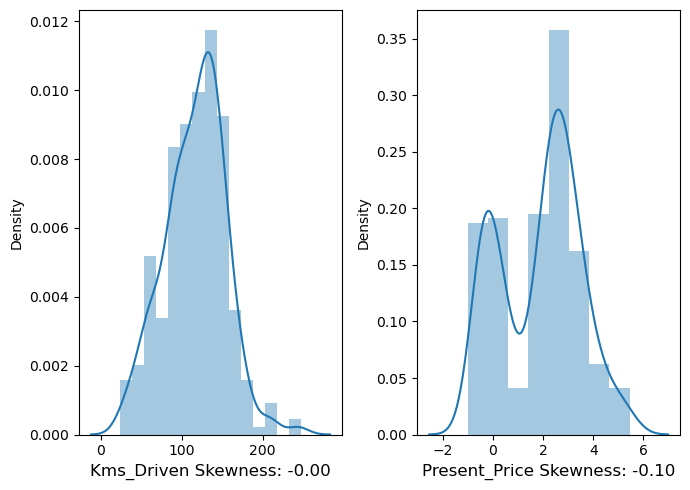

In [33]:
t=1
plt.figure(figsize=(7,5))
for i in ['Kms_Driven','Present_Price']:
    plt.subplot(1,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s Skewness: %.2f'%(i,data[i].skew()),fontsize=12)
    t+=1
plt.tight_layout()
plt.show()

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [37]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(238, 9) (238,) (60, 9) (60,)


### Scalling

In [38]:
from sklearn.preprocessing import RobustScaler

In [39]:
for i in ['Kms_Driven','Present_Price']:
    rs = RobustScaler()
    x_train[i] = rs.fit_transform(pd.DataFrame(x_train[i]))
    x_test[i] = rs.transform(pd.DataFrame(x_test[i]))
    

### Checking for assumption in Linear model

In [40]:
# Lets check for multicolinearity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]

In [43]:
pd.DataFrame({'VIF':vif},index=x_train.columns).sort_values(by='VIF',ascending=False)

,VIF
Seller_Type_Dealer,7.378079
Fuel_Type_Petrol,6.215815
Year,5.302700
Present_Price,4.480639
Car_Name,3.548248
Kms_Driven,1.337991
Transmission_Automatic,1.216897
Owner,1.073489
Fuel_Type_CNG,1.042966


#### Fit a base model

In [44]:
import statsmodels.api as sm

In [45]:
x_train_c = sm.add_constant(x_train)
x_test_c = sm.add_constant(x_test)

In [46]:
base_model = sm.OLS(y_train,x_train_c).fit()

In [47]:
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           7.60e-86
Time:                        00:46:45   Log-Likelihood:                -471.21
No. Observations:                 238   AIC:                             962.4
Df Residuals:                     228   BIC:                             997.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7

### Significance of the model

In [48]:
# Ho: The model is insignificant
# Ha: The model is significant

if base_model.f_pvalue > 0.05:
    print('Model is insignificant')
else:
    print('Model is significant')

Model is significant


### Check the significant features

In [49]:
print('Statistically significant columns: ')
for i in base_model.pvalues.to_dict():
    if base_model.pvalues.to_dict()[i]<0.05:
        print(i)

Statistically significant columns: 
const
Year
Present_Price
Kms_Driven
Fuel_Type_Petrol
Seller_Type_Dealer
Transmission_Automatic


<AxesSubplot:>

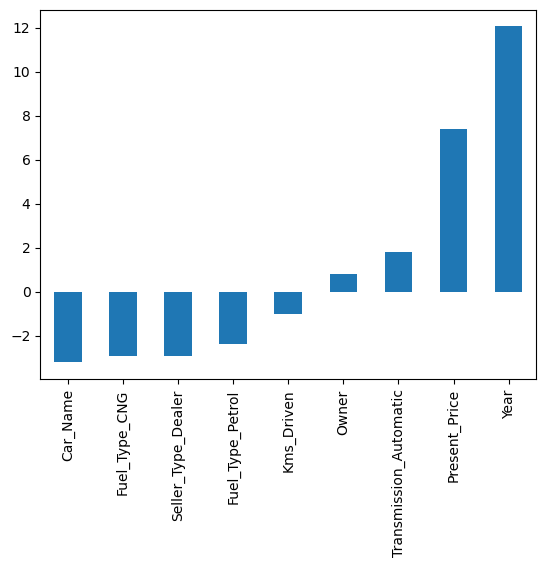

In [50]:
base_model.params[1:].sort_values().plot(kind='bar')

### Normality of residuals

In [51]:
import scipy.stats as stats

<AxesSubplot:ylabel='Density'>

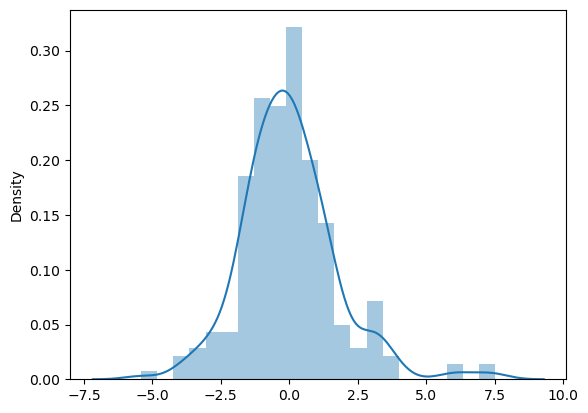

In [52]:
sns.distplot(base_model.resid)

In [53]:
# H0: Residuals is normal
# H1: Residuals are not normal
_,p = stats.shapiro(base_model.resid)
if p>0.05:
    print('Residual is normal')
else:
    print('Residual is not normal')

Residual is not normal


In [54]:
from statsmodels.graphics.gofplots import qqplot

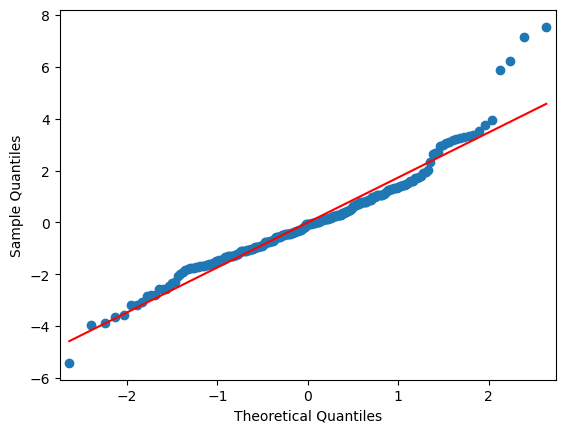

In [55]:
qqplot(base_model.resid,line='r')
plt.show()

### Homoscedasticity

In [56]:
y_pred_train = base_model.predict(x_train_c)

<AxesSubplot:xlabel='Selling_Price'>

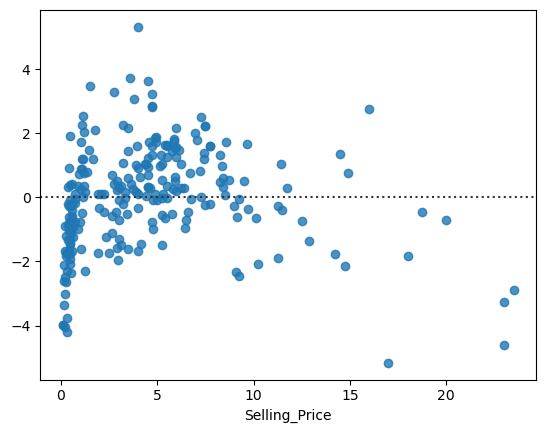

In [57]:
sns.residplot(y_train,y_pred_train)

In [58]:
# Ho: There is homoscedasticity
# Ha: There is heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

In [59]:
p = het_breuschpagan(base_model.resid,base_model.model.exog)[3]

In [60]:
if p < 0.05:
    print('Homoscedasticity is not present')
else:
    print('Homoscedasticity is present')

Homoscedasticity is not present


### Validate the base model

In [61]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [62]:
def validation(fitted_model,train_x,train_y,test_x,test_y):
    y_pred_test = fitted_model.predict(test_x)
    r2 = r2_score(test_y,y_pred_test)
    print('R2',r2)
    adj_r2 = 1- (((1-r2)*(train_x.shape[0]-1))/(train_x.shape[0] - train_x.shape[1] - 1))
    print('Adjusted R2',adj_r2)
    print('MSE',mean_squared_error(test_y,y_pred_test))
    print('RMSE',mean_squared_error(test_y,y_pred_test)**0.5)
    print('MAPE',mean_absolute_percentage_error(test_y,y_pred_test))    

In [63]:
validation(base_model,x_train_c,y_train,x_test_c,y_test)

R2 0.719792404477704
Adjusted R2 0.7074484575383958
MSE 6.514909599610011
RMSE 2.552432095004686
MAPE 1.2621491540615186


### Models from sklearn

In [64]:
def model_validation(model,train_x,train_y,test_x,test_y):
    global m
    m = model
    m.fit(x_train,y_train)
    print('%s'%model)
    print('Train Parameters:')
    validation(m,train_x,train_y,train_x,train_y)
    print('\nTest parametrs:')
    validation(m,train_x,train_y,test_x,test_y)

In [65]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [66]:
model_validation(LinearRegression(),x_train,y_train,x_test,y_test)

LinearRegression()
Train Parameters:
R2 0.8409390653345111
Adjusted R2 0.8346603442292945
MSE 3.07047445119344
RMSE 1.752276933362258
MAPE 1.2838475804864788

Test parametrs:
R2 0.7197924044777039
Adjusted R2 0.7087315783386658
MSE 6.514909599610013
RMSE 2.5524320950046864
MAPE 1.2621491540615177


In [67]:
model_validation(SGDRegressor(),x_train,y_train,x_test,y_test)

SGDRegressor()
Train Parameters:
R2 0.8170163342484908
Adjusted R2 0.8097932948109313
MSE 3.5322731622149313
RMSE 1.8794342665320678
MAPE 1.2661273166235252

Test parametrs:
R2 0.7447733343178758
Adjusted R2 0.7346985975146341
MSE 5.934095580919464
RMSE 2.435999913981826
MAPE 1.3320125315762688


In [68]:
# Models seems to be overfitted, lets try regularization technique

In [69]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [70]:
model_validation(Lasso(alpha=0.1),x_train,y_train,x_test,y_test)

Lasso(alpha=0.1)
Train Parameters:
R2 0.7897928105928075
Adjusted R2 0.7814951583793657
MSE 4.057789587929562
RMSE 2.0143955887386076
MAPE 1.066783026587899

Test parametrs:
R2 0.7297058199341718
Adjusted R2 0.7190363128263102
MSE 6.284419753673177
RMSE 2.50687449898737
MAPE 1.0852330697234736


In [71]:
m.coef_

array([ 0.        ,  0.        ,  5.44555295, -1.0762754 ,  0.        ,
       -0.        , -2.13690092, -0.20452321,  1.44250249])

In [72]:
model_validation(Ridge(alpha=10),x_train,y_train,x_test,y_test)

Ridge(alpha=10)
Train Parameters:
R2 0.7934254096086808
Adjusted R2 0.7852711494616551
MSE 3.9876667605167455
RMSE 1.9969143097581192
MAPE 0.9698210986976171

Test parametrs:
R2 0.7318064091262566
Adjusted R2 0.7212198200128194
MSE 6.235580432716006
RMSE 2.497114421230234
MAPE 1.0960223146556654


In [73]:
m.coef_

array([ 0.1095103 ,  0.80940919,  5.06915198, -1.07329552,  0.01876132,
       -0.26100025, -2.39332327, -0.28797749,  1.80712423])

In [74]:
model_validation(ElasticNet(l1_ratio=0.5,alpha=0.1),x_train,y_train,x_test,y_test)

ElasticNet(alpha=0.1)
Train Parameters:
R2 0.7732111217868349
Adjusted R2 0.764258929225789
MSE 4.3778785647952665
RMSE 2.0923380617852523
MAPE 0.8257040643824309

Test parametrs:
R2 0.7124377318473851
Adjusted R2 0.7010865896834662
MSE 6.685907916882393
RMSE 2.585712264905435
MAPE 0.9763499140821925


### Lets Try Feature Selection

In [75]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [76]:
sfs = SequentialFeatureSelector(estimator=Ridge(alpha=10),
                                k_features='best',
                               cv=3,
                               scoring='r2',forward=False,
                               verbose=3)

In [77]:
sfs.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-06-04 00:46:52] Features: 8/1 -- score: 0.7561293733463925[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-06-04 00:46:52] Features: 7/1 -- score: 0.7564845207180041[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parall

SequentialFeatureSelector(cv=3, estimator=Ridge(alpha=10), forward=False,
                          k_features=(1, 9), scoring='r2', verbose=3)

In [78]:
k_features = list(sfs.k_feature_names_)

In [79]:
k_features

['Year',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type_CNG',
 'Fuel_Type_Petrol',
 'Transmission_Automatic']

In [80]:
lm = Ridge(alpha=10)

In [81]:
lm.fit(x_train[k_features],y_train)

Ridge(alpha=10)

In [82]:
validation(lm,x_train[k_features],y_train,x_test[k_features],y_test)

R2 0.7317361640477984
Adjusted R2 0.724768272204884
MSE 6.237213651598312
RMSE 2.4974414210544182
MAPE 1.099974896864141


In [83]:
validation(lm,x_train[k_features],y_train,x_train[k_features],y_train)

R2 0.7892645535807624
Adjusted R2 0.7837909056218212
MSE 4.06798693564765
RMSE 2.0169251189986332
MAPE 0.991014746387584


### Lets fine tune the final model

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid = {'alpha':range(1,16)}

In [86]:
gscv = GridSearchCV(estimator=Ridge(),
                   param_grid=grid,
                   cv=3,verbose=3)

In [87]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END ...........................alpha=1;, score=0.783 total time=   0.0s
[CV 2/3] END ...........................alpha=1;, score=0.817 total time=   0.0s
[CV 3/3] END ...........................alpha=1;, score=0.770 total time=   0.0s
[CV 1/3] END ...........................alpha=2;, score=0.788 total time=   0.0s
[CV 2/3] END ...........................alpha=2;, score=0.812 total time=   0.0s
[CV 3/3] END ...........................alpha=2;, score=0.758 total time=   0.0s
[CV 1/3] END ...........................alpha=3;, score=0.790 total time=   0.0s
[CV 2/3] END ...........................alpha=3;, score=0.808 total time=   0.0s
[CV 3/3] END ...........................alpha=3;, score=0.747 total time=   0.0s
[CV 1/3] END ...........................alpha=4;, score=0.791 total time=   0.0s
[CV 2/3] END ...........................alpha=4;, score=0.804 total time=   0.0s
[CV 3/3] END ...........................alpha=4;

GridSearchCV(cv=3, estimator=Ridge(), param_grid={'alpha': range(1, 16)},
             verbose=3)

In [88]:
gscv.best_params_

{'alpha': 1}

In [89]:
final_model = Ridge(**gscv.best_params_)

In [90]:
final_model.fit(x_train[k_features],y_train)

Ridge(alpha=1)

In [91]:
print('Train Parameter')
validation(final_model,x_train[k_features],y_train,x_train[k_features],y_train)

Train Parameter
R2 0.8087546148762779
Adjusted R2 0.8037872022756617
MSE 3.6917554279809313
RMSE 1.9213941365531777
MAPE 1.3175714604176416


In [92]:
print('Test Parameter')
validation(final_model,x_train[k_features],y_train,x_test[k_features],y_test)

Test Parameter
R2 0.7635290206425207
Adjusted R2 0.7573869172825862
MSE 5.49802031802039
RMSE 2.3447857723085046
MAPE 1.2906007875201637
